# PRABAL GHOSH    ROLL-40     ASSIGNMENT-ROC-AUC_MACHINE_LEARNING

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification # Generate a random n-class classification problem. This initially creates clusters of points normally distributed (std=1) about vertices of an n_informative -dimensional hypercube with sides of length 2*class_sep and assigns an equal number of clusters to each class.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score


In [77]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [78]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart (1).csv


in case of jupiter note book open the csv file from this folder

heart=pd.read_csv('D:\\semester 3 videos\\Machine Learning\\notes\\Lab\\Lab7_18_10\\heart.csv')


In [79]:
#data_X, class_label = make_classification(n_samples=1000, n_classes=2,weights=[0.5,0.5], random_state=1)
heart=pd.read_csv("heart.csv")
data_X=heart.iloc[:,0:13]
class_label=heart.iloc[:,13]

In [80]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [81]:
trainX, testX, trainy, testy = train_test_split(data_X, class_label, test_size=0.3, random_state=1)

In [82]:
trainX

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3


In [83]:
trainy

34     1
185    0
187    0
147    1
202    0
      ..
203    0
255    0
72     1
235    0
37     1
Name: target, Length: 212, dtype: int64

In [84]:
testX

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1


In [85]:
testy

204    0
159    1
219    0
174    0
184    0
      ..
106    1
105    1
67     1
291    0
247    0
Name: target, Length: 91, dtype: int64

In [86]:
model = RandomForestClassifier()
model.fit(trainX, trainy)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
# ADDED BY ME
pred_y=model.predict(testX)
pred_y

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0])

In [88]:
probs = model.predict_proba(testX)    # PROBABILITY OF A PARTICULAR TEST DATA BELONGS TO WHICH CLASS THAT IS CLASS 0 OR CLASS 1

In [89]:
print(probs)

[[0.89 0.11]
 [0.14 0.86]
 [0.8  0.2 ]
 [1.   0.  ]
 [0.83 0.17]
 [0.95 0.05]
 [0.95 0.05]
 [0.56 0.44]
 [1.   0.  ]
 [0.07 0.93]
 [0.52 0.48]
 [0.68 0.32]
 [0.16 0.84]
 [0.62 0.38]
 [0.56 0.44]
 [0.2  0.8 ]
 [0.06 0.94]
 [0.85 0.15]
 [0.16 0.84]
 [0.32 0.68]
 [0.18 0.82]
 [0.85 0.15]
 [0.37 0.63]
 [0.21 0.79]
 [0.11 0.89]
 [0.05 0.95]
 [0.99 0.01]
 [0.13 0.87]
 [0.23 0.77]
 [0.03 0.97]
 [0.02 0.98]
 [0.01 0.99]
 [0.19 0.81]
 [0.34 0.66]
 [0.91 0.09]
 [0.33 0.67]
 [0.63 0.37]
 [0.67 0.33]
 [0.34 0.66]
 [0.71 0.29]
 [0.16 0.84]
 [0.82 0.18]
 [0.81 0.19]
 [0.98 0.02]
 [0.5  0.5 ]
 [0.13 0.87]
 [0.96 0.04]
 [0.45 0.55]
 [0.24 0.76]
 [0.46 0.54]
 [0.   1.  ]
 [0.42 0.58]
 [0.45 0.55]
 [0.49 0.51]
 [0.13 0.87]
 [0.12 0.88]
 [0.56 0.44]
 [0.97 0.03]
 [0.32 0.68]
 [0.89 0.11]
 [0.7  0.3 ]
 [0.13 0.87]
 [0.11 0.89]
 [0.32 0.68]
 [0.28 0.72]
 [0.05 0.95]
 [0.39 0.61]
 [0.75 0.25]
 [0.83 0.17]
 [0.97 0.03]
 [0.2  0.8 ]
 [0.02 0.98]
 [0.87 0.13]
 [0.54 0.46]
 [0.98 0.02]
 [0.52 0.48]
 [0.42 0.58]

In [90]:
probs = probs[:, 1]   
probs

array([0.11, 0.86, 0.2 , 0.  , 0.17, 0.05, 0.05, 0.44, 0.  , 0.93, 0.48,
       0.32, 0.84, 0.38, 0.44, 0.8 , 0.94, 0.15, 0.84, 0.68, 0.82, 0.15,
       0.63, 0.79, 0.89, 0.95, 0.01, 0.87, 0.77, 0.97, 0.98, 0.99, 0.81,
       0.66, 0.09, 0.67, 0.37, 0.33, 0.66, 0.29, 0.84, 0.18, 0.19, 0.02,
       0.5 , 0.87, 0.04, 0.55, 0.76, 0.54, 1.  , 0.58, 0.55, 0.51, 0.87,
       0.88, 0.44, 0.03, 0.68, 0.11, 0.3 , 0.87, 0.89, 0.68, 0.72, 0.95,
       0.61, 0.25, 0.17, 0.03, 0.8 , 0.98, 0.13, 0.46, 0.02, 0.48, 0.58,
       0.13, 0.07, 0.22, 0.87, 0.94, 0.1 , 0.68, 0.73, 0.8 , 0.54, 0.67,
       0.98, 0.18, 0.48])

In [91]:
auc = roc_auc_score(testy, probs)
print('AUC: %.2f' % auc)

AUC: 0.86


#ADD BY ME


IS IT POSSIBLE TO TAKE PROBABILITY OF A PARTICULAR TEST DATA BELONGS TO CLASS 0

probs_0 = probs[:, 0]   
probs_0

auc_0 = roc_auc_score(testy, probs_0)
print('AUC: %.2f' % auc_0)

In [92]:
# ADDED BY ME
from sklearn.metrics import accuracy_score

In [93]:
# ADDED BY ME
accuracy_score(y_true=testy, y_pred=pred_y)

0.7582417582417582

In [94]:
fpr, tpr, thresholds = roc_curve(testy, probs)
print(thresholds)
print(fpr)
print(tpr)
print(thresholds[np.argmax(tpr - fpr)])

[2.   1.   0.99 0.98 0.97 0.94 0.93 0.89 0.88 0.87 0.86 0.84 0.81 0.8
 0.77 0.76 0.73 0.72 0.68 0.67 0.66 0.61 0.58 0.55 0.54 0.51 0.5  0.48
 0.46 0.44 0.38 0.37 0.32 0.29 0.25 0.22 0.2  0.19 0.18 0.17 0.11 0.07
 0.05 0.04 0.02 0.01 0.  ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02439024 0.02439024 0.04878049
 0.04878049 0.07317073 0.07317073 0.09756098 0.09756098 0.12195122
 0.17073171 0.17073171 0.19512195 0.19512195 0.24390244 0.26829268
 0.26829268 0.26829268 0.29268293 0.31707317 0.31707317 0.34146341
 0.36585366 0.36585366 0.41463415 0.41463415 0.43902439 0.43902439
 0.46341463 0.46341463 0.51219512 0.53658537 0.68292683 0.75609756
 0.80487805 0.82926829 0.92682927 0.95121951 1.        ]
[0.   0.02 0.04 0.1  0.12 0.2  0.22 0.26 0.28 0.36 0.38 0.42 0.46 0.5
 0.54 0.54 0.56 0.56 0.6  0.64 0.66 0.7  0.7  0.72 0.76 0.78 0.78 0.82
 0.84 0.88 0.88 0.9  0.9  0.94 0.94 0.96 0.96 0.98 0.98 1.   1.   1.
 1.   1.   1.   1.   1.  ]
0.44


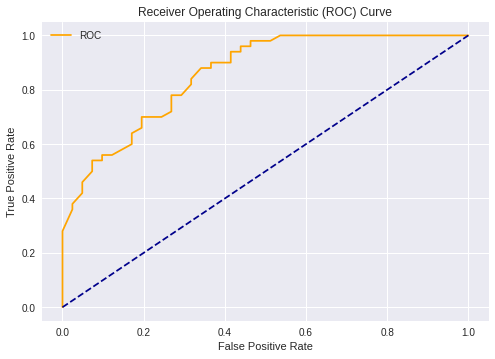

In [95]:
plot_roc_curve(fpr, tpr)

In [96]:
# ADDED BY ME
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [97]:
# ADDED BY ME
confusion_matrix(testy,pred_y)

array([[30, 11],
       [11, 39]])

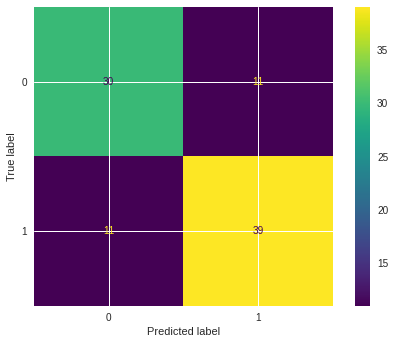

In [98]:
# ADDED BY ME
plot_confusion_matrix(model,testX,testy)   

In [99]:
# ADDED BY ME
print(classification_report(testy,pred_y))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        41
           1       0.78      0.78      0.78        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



Performance Curves
TASK: Create both the precision recall curve and the ROC Curve.

In [100]:
# ADDED BY ME
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

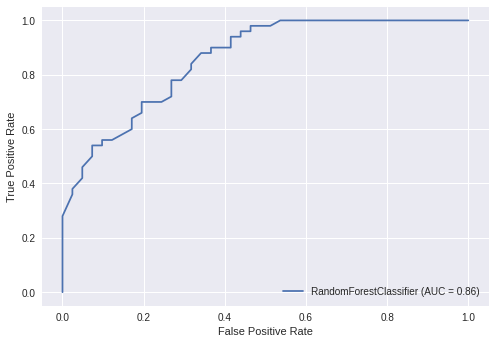

In [101]:
# ADDED BY ME
plot_roc_curve(model,testX,testy)

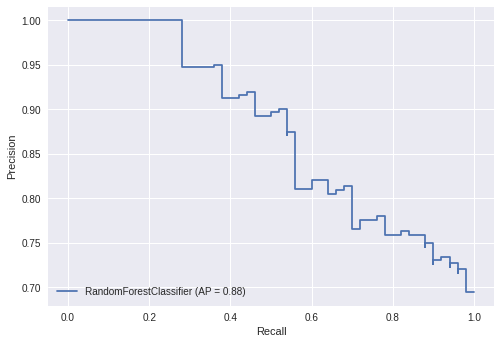

In [102]:
# ADDED BY ME
plot_precision_recall_curve(model,testX,testy)

### logistic regression

In [103]:
model_1 = LogisticRegression(solver='lbfgs')
model_1.fit(trainX, trainy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic: ROC AUC=0.870


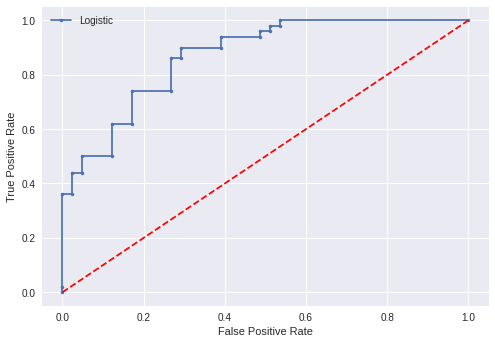

In [104]:
lr_probs = model_1.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores

lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores

print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves

lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model

plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

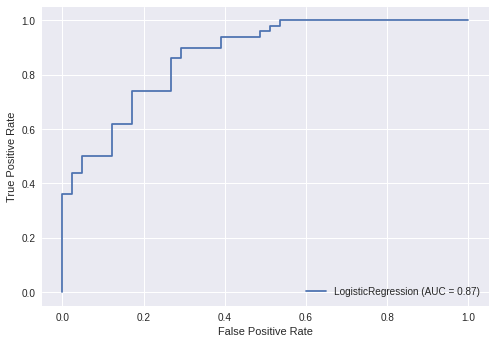

In [105]:
# ADDED BY ME
plot_roc_curve(model_1,testX,testy)

In [106]:
precision, recall, thresholds = precision_recall_curve(testy, probs)


In [107]:
print(thresholds)
print(precision)
print(recall)

[0.17 0.18 0.19 0.2  0.22 0.25 0.29 0.3  0.32 0.33 0.37 0.38 0.44 0.46
 0.48 0.5  0.51 0.54 0.55 0.58 0.61 0.63 0.66 0.67 0.68 0.72 0.73 0.76
 0.77 0.79 0.8  0.81 0.82 0.84 0.86 0.87 0.88 0.89 0.93 0.94 0.95 0.97
 0.98 0.99 1.  ]
[0.69444444 0.7        0.72058824 0.71641791 0.72727273 0.72307692
 0.734375   0.73015873 0.72580645 0.73770492 0.75       0.74576271
 0.75862069 0.76363636 0.75925926 0.76470588 0.78       0.7755102
 0.76595745 0.77777778 0.81395349 0.80952381 0.80487805 0.82051282
 0.81081081 0.84848485 0.875      0.87096774 0.9        0.89655172
 0.89285714 0.92       0.91666667 0.91304348 0.95       0.94736842
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]
[1.   0.98 0.98 0.96 0.96 0.94 0.94 0.92 0.9  0.9  0.9  0.88 0.88 0.84
 0.82 0.78 0.78 0.76 0.72 0.7  0.7  0.68 0.66 0.64 0.6  0.56 0.56 0.54
 0.54 0.52 0.5  0.46 0.44 0.42 0.38 0.36 0.28 0.26 0.22 0.2  0.16 0.12
 0.1  0.04 0.02 0.  ]


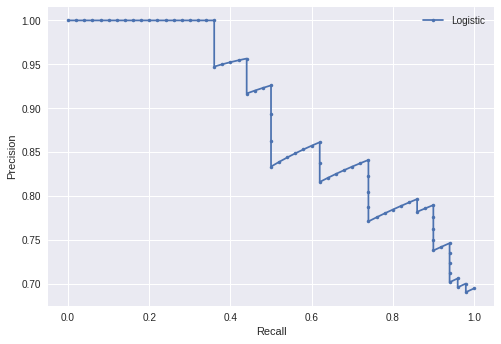

In [113]:
yhat = model_1.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)

# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

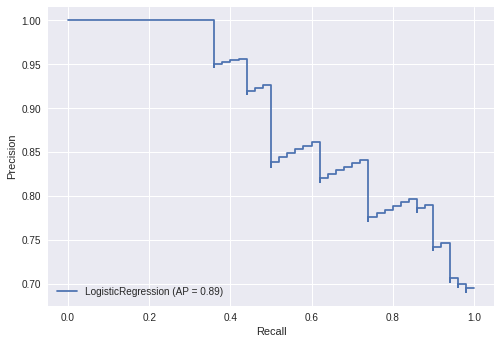

In [114]:
# ADDED BY ME
plot_precision_recall_curve(model_1,testX,testy)

In [115]:
# ADDED BY ME
pred_y_1_logistic=model_1.predict(testX)
pred_y_1_logistic

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0])

In [118]:
# ADDED BY ME
confusion_matrix(testy,pred_y_1_logistic)

array([[30, 11],
       [ 7, 43]])

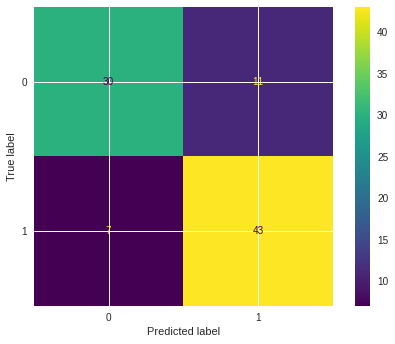

In [169]:
# ADDED BY ME
plot_confusion_matrix(model_1,testX,testy)   

In [119]:
# ADDED BY ME
print(classification_report(testy,pred_y_1_logistic))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77        41
           1       0.80      0.86      0.83        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [120]:
# ADDED BY ME
accuracy_score(y_true=testy, y_pred=pred_y_1_logistic)

0.8021978021978022

## KNN

In [121]:
model2 = KNeighborsClassifier(n_neighbors=4)

In [122]:
model2.fit(trainX, trainy)

# predict probabilities
pred_prob2 = model2.predict_proba(testX)

In [123]:
fpr2, tpr2, thresh2 = roc_curve(testy, pred_prob2[:,1], pos_label=1)
print(fpr2)

[0.         0.07317073 0.34146341 0.56097561 0.87804878 1.        ]


In [124]:
auc_score2 = roc_auc_score(testy, pred_prob2[:,1])

print(auc_score2)

0.6419512195121951


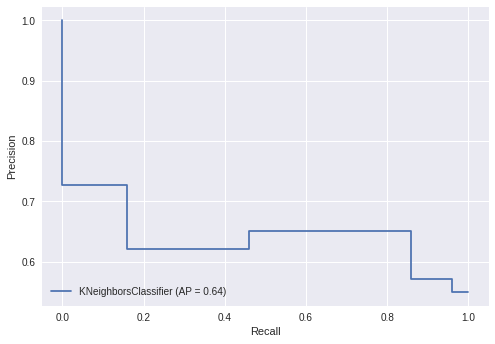

In [127]:
# ADDED BY ME
plot_precision_recall_curve(model2,testX,testy)

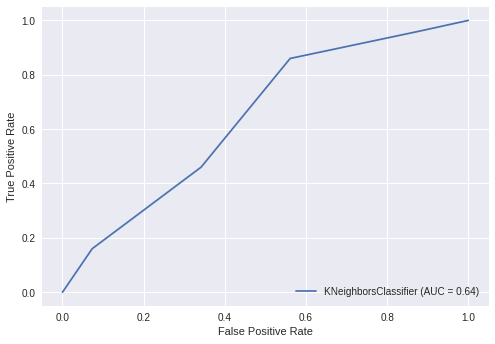

In [128]:
# ADDED BY ME
plot_roc_curve(model2,testX,testy)

In [129]:
# ADDED BY ME
pred_y_KNN=model2.predict(testX)
pred_y_KNN

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0])

In [130]:
# ADDED BY ME
confusion_matrix(testy,pred_y_KNN)

array([[27, 14],
       [27, 23]])

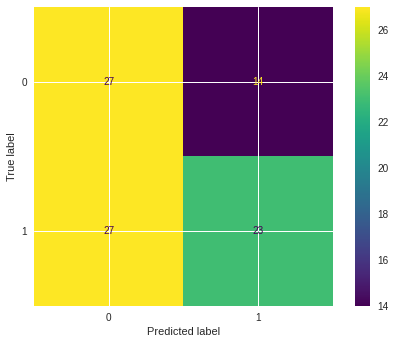

In [168]:
# ADDED BY ME
plot_confusion_matrix(model2,testX,testy)  

In [132]:
# ADDED BY ME
print(classification_report(testy,pred_y_KNN))

              precision    recall  f1-score   support

           0       0.50      0.66      0.57        41
           1       0.62      0.46      0.53        50

    accuracy                           0.55        91
   macro avg       0.56      0.56      0.55        91
weighted avg       0.57      0.55      0.55        91



In [133]:
# ADDED BY ME
accuracy_score(y_true=testy, y_pred=pred_y_KNN)

0.5494505494505495

## SVM

In [154]:
from sklearn import svm

In [155]:
from sklearn.svm import SVC

In [157]:
rbf_svc = svm.SVC(kernel='rbf', gamma=100, C=1,probability=True,random_state=1).fit(trainX, trainy)

In [158]:

prob=rbf_svc.predict_proba(testX)
auc_score3 = roc_auc_score(testy, prob[:,1])

print(auc_score3)
fpr3, tpr3, thresh3 = roc_curve(testy, prob[:,1], pos_label=1)


0.49


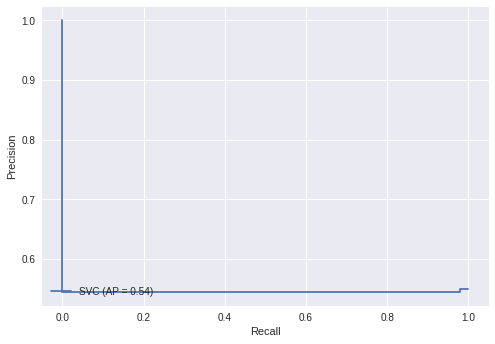

In [159]:
# ADDED BY ME
plot_precision_recall_curve(rbf_svc,testX,testy)

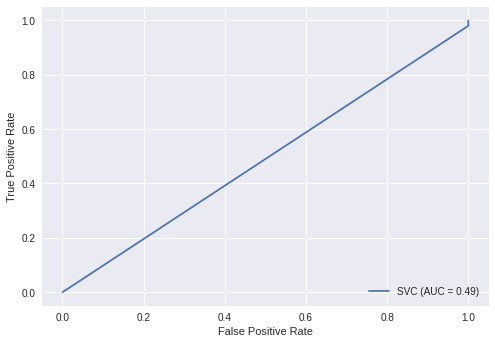

In [160]:
# ADDED BY ME
plot_roc_curve(rbf_svc,testX,testy)

In [161]:
# ADDED BY ME
pred_y_rbf_svc=rbf_svc.predict(testX)
pred_y_rbf_svc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [162]:
# ADDED BY ME
confusion_matrix(testy,pred_y_rbf_svc)

array([[ 0, 41],
       [ 0, 50]])

In [163]:
 from sklearn.metrics import plot_confusion_matrix

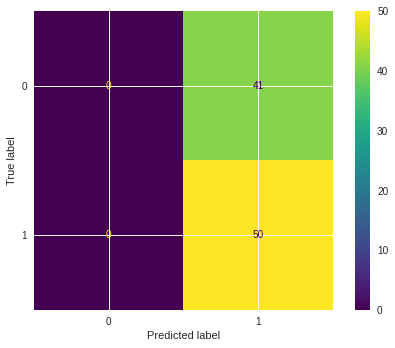

In [166]:
# ADDED BY ME
plot_confusion_matrix(rbf_svc,testX,testy)   


In [150]:
# ADDED BY ME
print(classification_report(testy,pred_y_rbf_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        41
           1       0.55      1.00      0.71        50

    accuracy                           0.55        91
   macro avg       0.27      0.50      0.35        91
weighted avg       0.30      0.55      0.39        91



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
# ADDED BY ME
accuracy_score(y_true=testy, y_pred=pred_y_rbf_svc)

0.5494505494505495

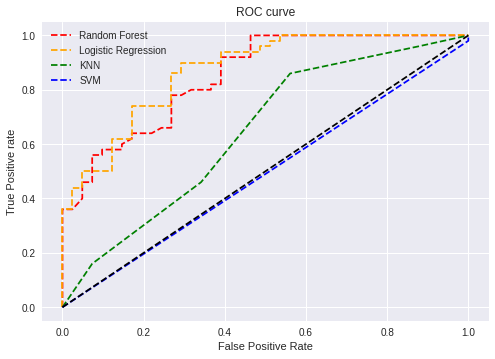

In [41]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='red', label='Random Forest')
plt.plot(lr_fpr, lr_tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='SVM')
plt.plot([0,1],[0,1],'k--')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

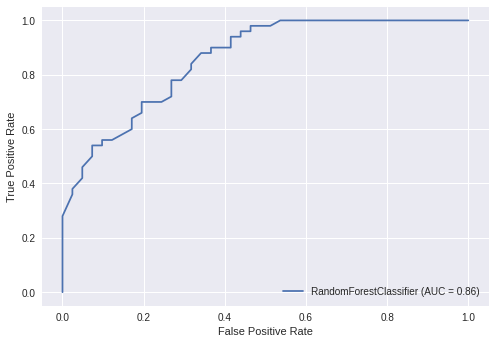

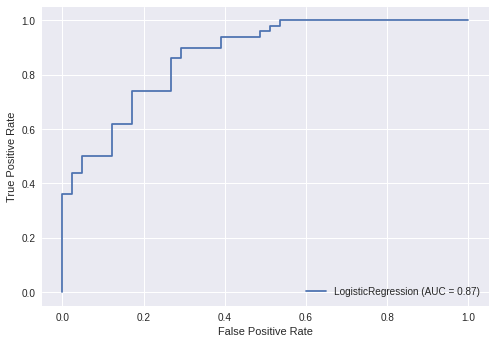

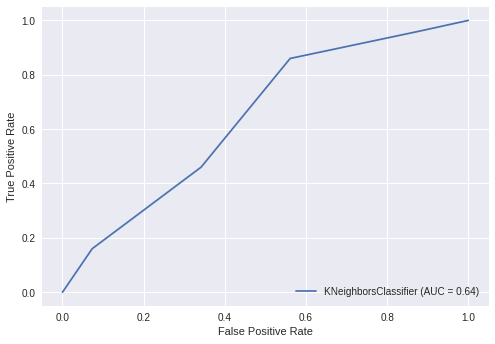

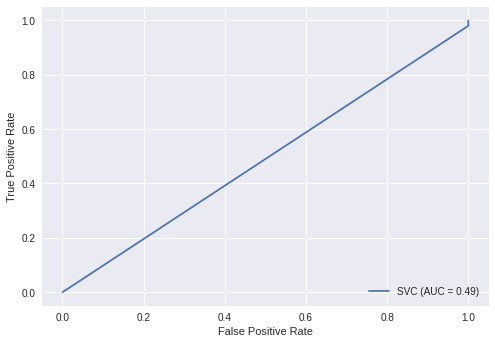

In [180]:
# ADDED BY ME
plot_roc_curve(model,testX,testy)
plot_roc_curve(model_1,testX,testy)
plot_roc_curve(model2,testX,testy)
plot_roc_curve(rbf_svc,testX,testy)